In [6]:
import load_dataset as ld
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [2]:
exoplanet_path = '../published_output/exoplanet.eu_catalog_15April.csv'
solar_path = '../published_output/solar_system_planets_catalog.csv'
features = ['mass', 'semi_major_axis','eccentricity', 'star_metallicity',
                'star_radius', 'star_teff','star_mass', 'radius']

dataset = ld.load_dataset(exoplanet_path, solar_path, features, solar=True)

In [12]:
dataset_exo = pd.read_csv(exoplanet_path, index_col=0)
# Select detected by RV
# dataset_radial = dataset_exo[dataset_exo.detection_type == 'Radial Velocity']
# dataset_radial = dataset
# the radius column in Null (=NaN)
# dataset_radial = dataset_radial[pd.isnull(dataset_radial['radius'])]

In [15]:
dataset_exo['detection_type'].unique()

array(['Radial Velocity', 'Imaging', 'Primary Transit', 'Timing',
       'Astrometry', 'Other', 'TTV', 'Controversial', 'Microlensing',
       'Primary Transit, TTV'], dtype=object)

In [10]:
feature_names=['mass', 'mass_error_min', 'mass_error_max',
                                   'semi_major_axis',
                                   'eccentricity',
                                   'star_metallicity',
                                   'star_radius',
                                   'star_teff', 'star_mass']
dataset_radial = dataset_radial[feature_names]
# Excluding exoplanets with missing data
dataset_radial = dataset_radial.dropna(subset=['mass', 'semi_major_axis',
                                               'eccentricity',
                                               'star_metallicity',
                                               'star_radius', 'star_teff',
                                               'star_mass'])

In [11]:
dataset_radial

,mass,mass_error_min,mass_error_max,semi_major_axis,eccentricity,star_metallicity,star_radius,star_teff,star_mass
# name,,,,,,,,,
11 Com b,19.400,1.500,1.500,1.2900,0.23100,-0.35,19.000,4742.0,2.70
11 UMi b,10.500,2.470,2.470,1.5400,0.08000,0.04,24.080,4340.0,1.80
14 And b,5.330,0.570,0.570,0.8300,0.00000,-0.24,11.000,4813.0,2.20
14 Her b,4.640,0.190,0.190,2.7700,0.36900,0.43,0.708,5311.0,0.90
16 Cyg B b,1.680,0.070,0.070,1.6800,0.68900,0.08,0.980,5766.0,1.01
...,...,...,...,...,...,...,...,...,...
tau Gem b,20.600,NaN,NaN,1.1700,0.03100,0.14,26.800,4388.0,2.30
ups And b,0.620,0.090,inf,0.0590,0.01186,0.09,1.631,6212.0,1.27
ups And c,9.100,2.930,5.040,0.8610,0.24450,0.09,1.631,6212.0,1.27


In [3]:
dataset_exo = dataset[:-8]
dataset_solar = dataset[-8:]

In [4]:
def plot_dataset(dataset, predicted_radii=[], rv=False):

    if not rv:
        # Remove outlier planets
        dataset = dataset.drop(['Kepler-11 g'])
        dataset = dataset.drop(['K2-95 b'])
        dataset = dataset.drop(['HATS-12 b'])

        # Plot the original dataset
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_xscale('log')
        ax.set_yscale('log')

        size = dataset.temp_eq
        plt.scatter(dataset.mass, dataset.radius, c=size,
                    cmap=cm.magma_r, s=4, label='Verification sample')
        plt.colorbar(label=r'Equilibrium temperature (K)')
        plt.xlabel(r'Mass ($M_\oplus$)')
        plt.ylabel(r'Radius ($R_\oplus$)')
        plt.legend(loc='lower right', markerscale=0,
                   handletextpad=0.0, handlelength=0)

    if rv:
        # Plot the radial velocity dataset
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_xscale('log')
        ax.set_yscale('log')

        size = dataset.temp_eq
        plt.scatter(dataset.mass, predicted_radii, c=size,
                    cmap=cm.magma_r, s=4, label='RV sample')
        plt.colorbar(label=r'Equilibrium temperature (K)')
        plt.xlabel(r'Mass ($M_\oplus$)')
        plt.ylabel(r'Radius ($R_\oplus$)')
        plt.legend(loc='lower right', markerscale=0,
                   handletextpad=0.0, handlelength=0)

    return None

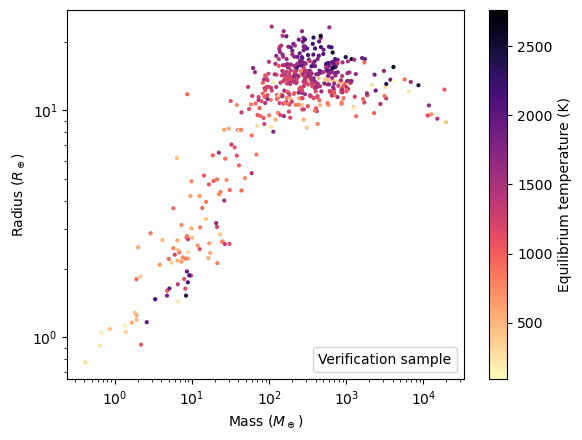

In [5]:
plot_dataset(dataset_exo)